# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


In [2]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/100D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-05-02 08:52:46.993926: Importing os...
2024-05-02 08:52:46.994146: Importing sys...
Visible devices: [2]
2024-05-02 08:52:46.994380: Importing timer from timeit...
2024-05-02 08:52:46.994446: Setting env variables for tf import (only device(s) [2] will be available)...
2024-05-02 08:52:46.994576: Importing numpy...


2024-05-02 08:52:47.105603: Importing matplotlib...
2024-05-02 08:52:47.453314: Importing h5py...
2024-05-02 08:52:47.516272: Importing importlib.util...
2024-05-02 08:52:47.516377: Importing json...
2024-05-02 08:52:47.516441: Importing pandas...
2024-05-02 08:52:47.960464: Importing random...
2024-05-02 08:52:47.960602: Importing scipy utils...
2024-05-02 08:52:48.365943: Importing subprocess...
2024-05-02 08:52:48.366072: Importing tensorflow...
Tensorflow version: 2.16.1
2024-05-02 08:52:51.652168: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-05-02 08:52:52.778992: Importing timeit...
2024-05-02 08:52:52.779084: Importing tqdm...
2024-05-02 08:52:52.786863: Importing typing...
2024-05-02 08:52:52.786967: Setting tf configs...
2024-05-02 08:52:52.911609: Importing GMetrics module...


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-05-02 08:52:57.452181: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #2, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-05-02 08:52:57.481769: All done.


# Model definition

In [3]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


# Fixed $n=50000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 50_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 500000000
batch_size 50000
niter 10000
niter * batch_size 500000000
small_sample False


In [7]:
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100, # to be included in metric kwargs
                           seed_slicing = 0, # to be included in metric kwargs
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 20, # to be included in metric kwargs
                               num_points = 10, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4, # to be included in metric kwargs
                               block_size = 20_000, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,50000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,500000000,False,10


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetric",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": null_hypotheses_dir+"FGD.json"},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetric" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 20_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": null_hypotheses_dir+"MMD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fgd': {'name': 'fgd',
  'object_name': 'FGDMetric',
  'class_name': 'GMetrics.FGDMetric',
  'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: 1',
  'test_config': {'niter': 10000,
   'batch_size_test': 50000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 500000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 50,
  'latex': '$d_{\\mathrm{FGD}}$',
  'null_file': 'results/100D_mixture/100D_50K/null_hypothesis/FGD.json'},
 'mmd': {'name': 'mmd',
  'object_name': 'MMDMetric',
  'class_name': 'GMetrics

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/100D_mixture/100D_50K/null_hypothesis/FGD.json
Loading mmd from results/100D_mixture/100D_50K/null_hypothesis/MMD.json
Loading ks from results/100D_mixture/100D_50K/null_hypothesis/KS.json


Loading sks from results/100D_mixture/100D_50K/null_hypothesis/SKS.json
Loading swd from results/100D_mixture/100D_50K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [6800, 3199], 0.015263120454184619], [0.95, [9500, 500], 0.08511624635777021], [0.99, [9900, 100], 0.13709383792460267]]
Computing time for metric fgd: 16872.762053856044
ThresholdS for metric mmd: [[0.68, [6800, 3199], 0.046901696856437525], [0.95, [9500, 500], 0.32944378937123986], [0.99, [9900, 100], 0.5526584427239527]]
Computing time for metric mmd: 14527.851479155943
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9129502184590641], [0.95, [9500, 500], 1.0907652480771197], [0.99, [9900, 100], 1.2081802702978335]]
Computing time for metric ks: 842.4580987879308
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9106410004416741], [0.95, [9500, 500], 1.0784950932341122], [0.99, [9900, 100], 1.1849058473005298]]
Computing time for metric sks: 797.2924133500783
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.3489450690289662], [0.95, [9500, 500], 0.44274076525906536], [0.99, [9900, 100], 0.5031477888286332]]
Computing time for metric swd: 376.5

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fab3c0ea020>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$d_{\mathrm{FGD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.015263120454184619], [..."
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 20000, 'normalise'...",metric_list,<function <lambda> at 0x7fab3c0ea0c0>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",2,$d_{\mathrm{MMD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.046901696856437525], [..."
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fab3c0eb4c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",5000,$\overline{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9129502184590641], [0...."
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fab3c0eb560>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9106410004416741], [0...."
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fab3c0eb600>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{W}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.3489450690289662], [0...."
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fab3c0eb6a0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",20,$t_{\mu}$,results/100D_mixture/100D_50K/null_hypothesis/...,[]


### Plots of null-distributions

mu = 0.018139250350937268 +/- 9.961101875196726e-06
sigma = 0.03156121334042265 +/- 0.00048753531469123004
68%CL = 0.015263120454184619, 95%CL = 0.08511624635777021, 99%CL = 0.13709383792460267
mu = 0.018139250350937268 +/- 9.961101875196726e-06
sigma = 0.03156121334042265 +/- 0.00048753531469123004


/tmp/ipykernel_1312135/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1312135/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1312135/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


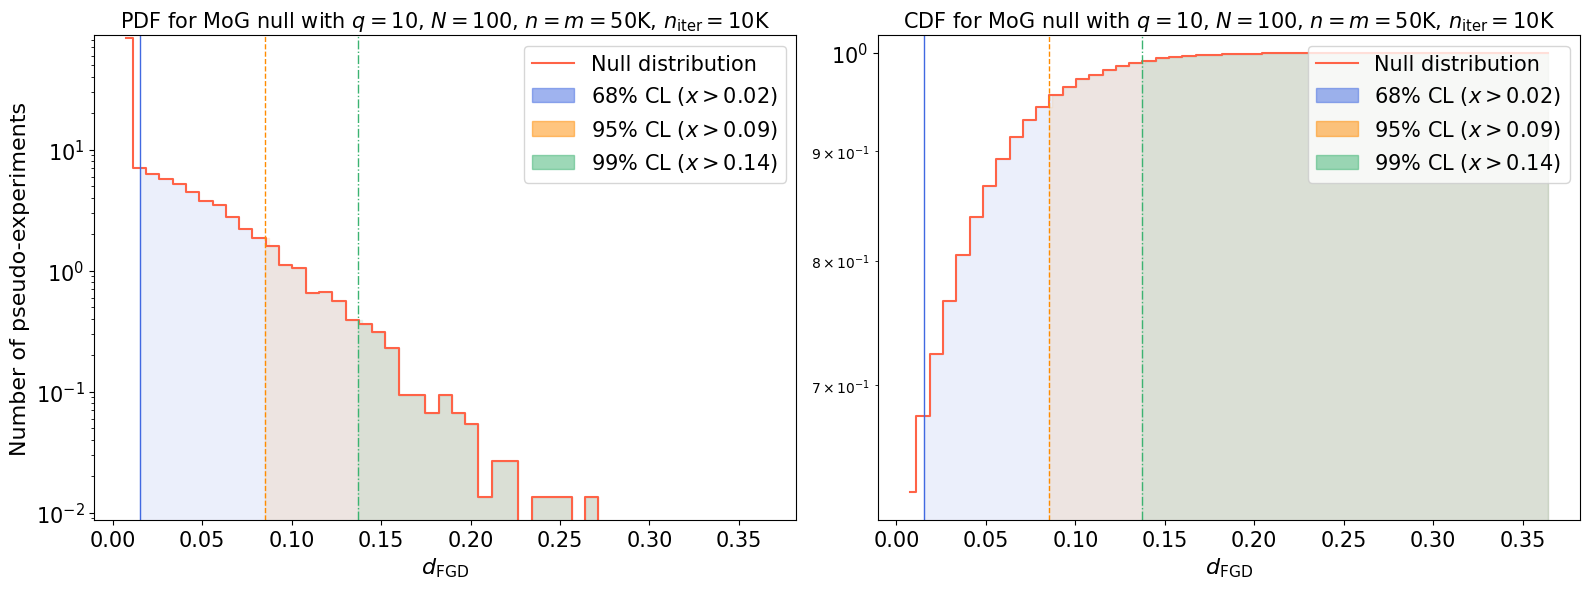

Time elapsed: 1.4858248080126941 seconds.
mu = -0.0015770667262726078 +/- 0.0003029045189259224
sigma = 0.17404152347239504 +/- 0.0017925430565718379
68%CL = 0.046901696856437525, 95%CL = 0.32944378937123986, 99%CL = 0.5526584427239527
mu = -0.0015770667262726078 +/- 0.0003029045189259224
sigma = 0.17404152347239504 +/- 0.0017925430565718379


/tmp/ipykernel_1312135/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1312135/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1312135/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1312135/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


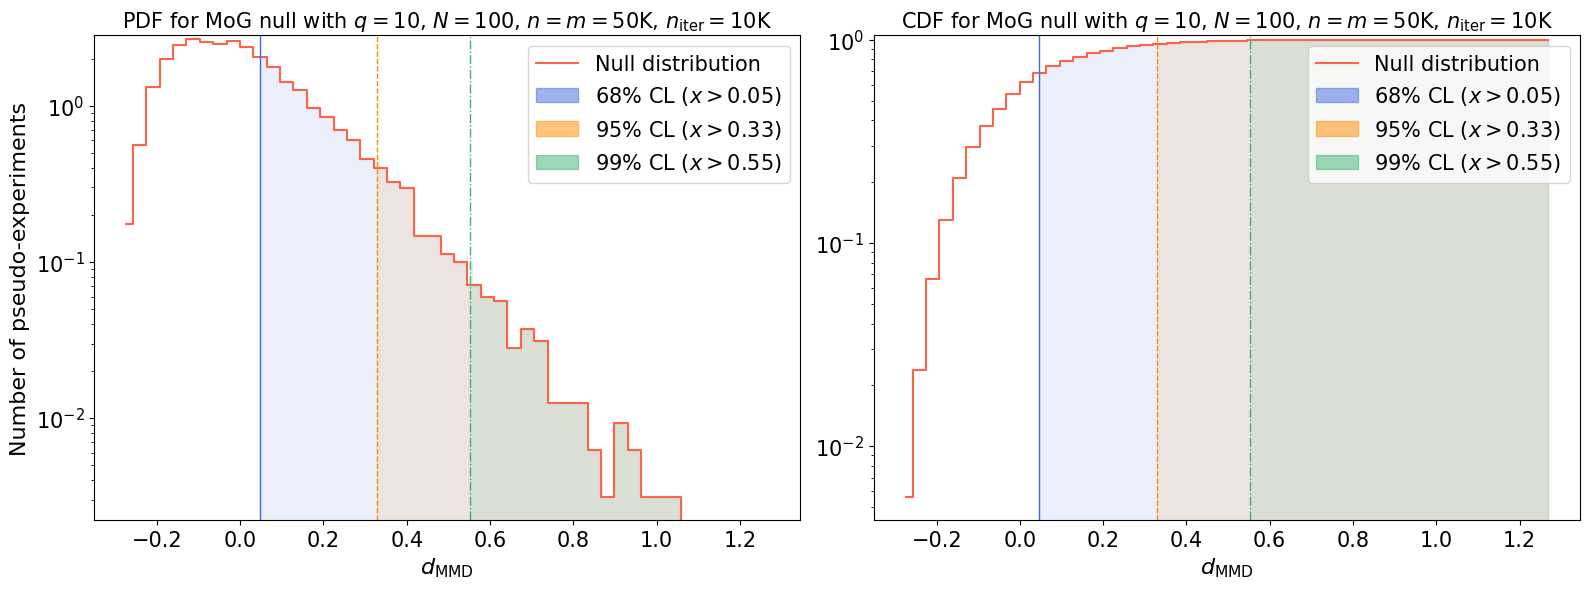

Time elapsed: 0.9129154840484262 seconds.
mu = 0.8662365867597424 +/- 0.0001480059876266251
sigma = 0.1216577114804586 +/- 0.0009728503736558672
68%CL = 0.9129502184590641, 95%CL = 1.0907652480771197, 99%CL = 1.2081802702978335
mu = 0.8662365867597424 +/- 0.0001480059876266251
sigma = 0.1216577114804586 +/- 0.0009728503736558672


/tmp/ipykernel_1312135/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1312135/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1312135/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1312135/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


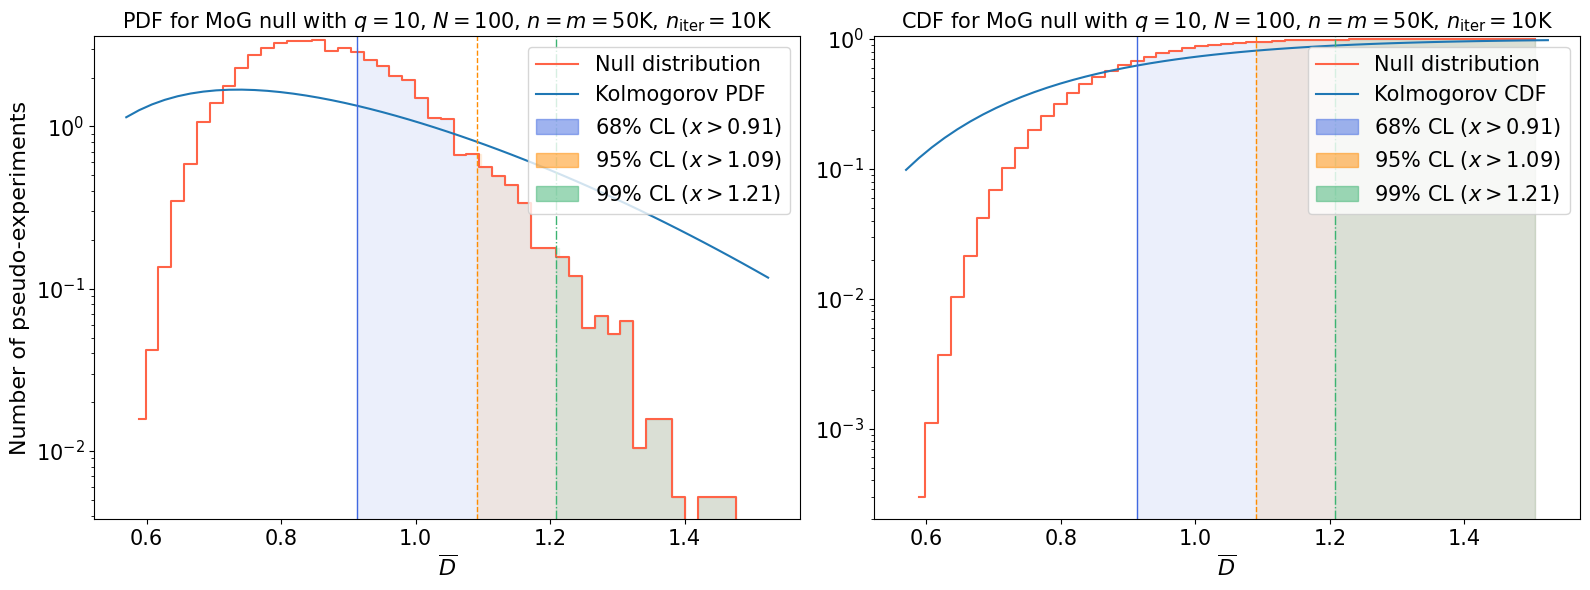

Time elapsed: 1.2727835411205888 seconds.
mu = 0.8666788590304592 +/- 0.0001327280454233097
sigma = 0.1152076583493084 +/- 0.0009073435752372434
68%CL = 0.9106410004416741, 95%CL = 1.0784950932341122, 99%CL = 1.1849058473005298
mu = 0.8666788590304592 +/- 0.0001327280454233097
sigma = 0.1152076583493084 +/- 0.0009073435752372434


/tmp/ipykernel_1312135/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1312135/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1312135/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1312135/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


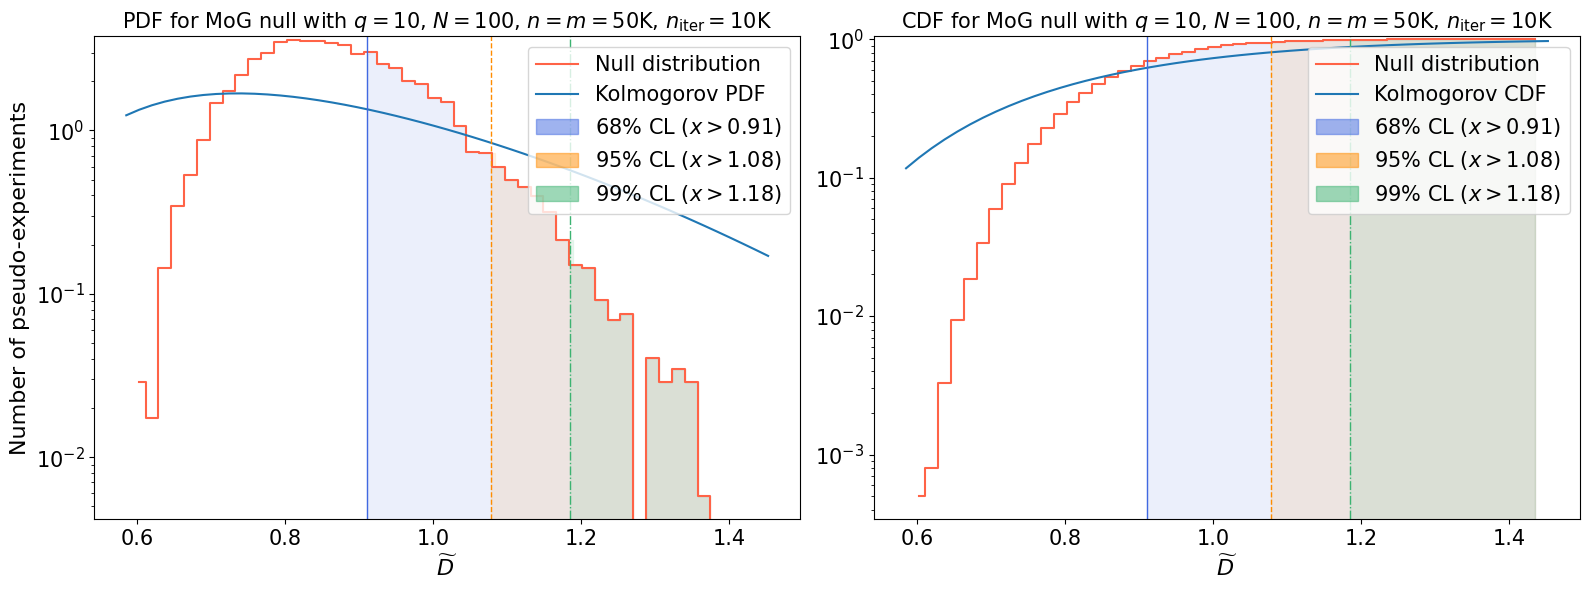

Time elapsed: 1.2850224620196968 seconds.
mu = 0.3230092286661759 +/- 4.3762063505444405e-05
sigma = 0.06615290130103471 +/- 0.0005071021044157315
68%CL = 0.3489450690289662, 95%CL = 0.44274076525906536, 99%CL = 0.5031477888286332
mu = 0.3230092286661759 +/- 4.3762063505444405e-05
sigma = 0.06615290130103471 +/- 0.0005071021044157315


/tmp/ipykernel_1312135/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1312135/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1312135/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1312135/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


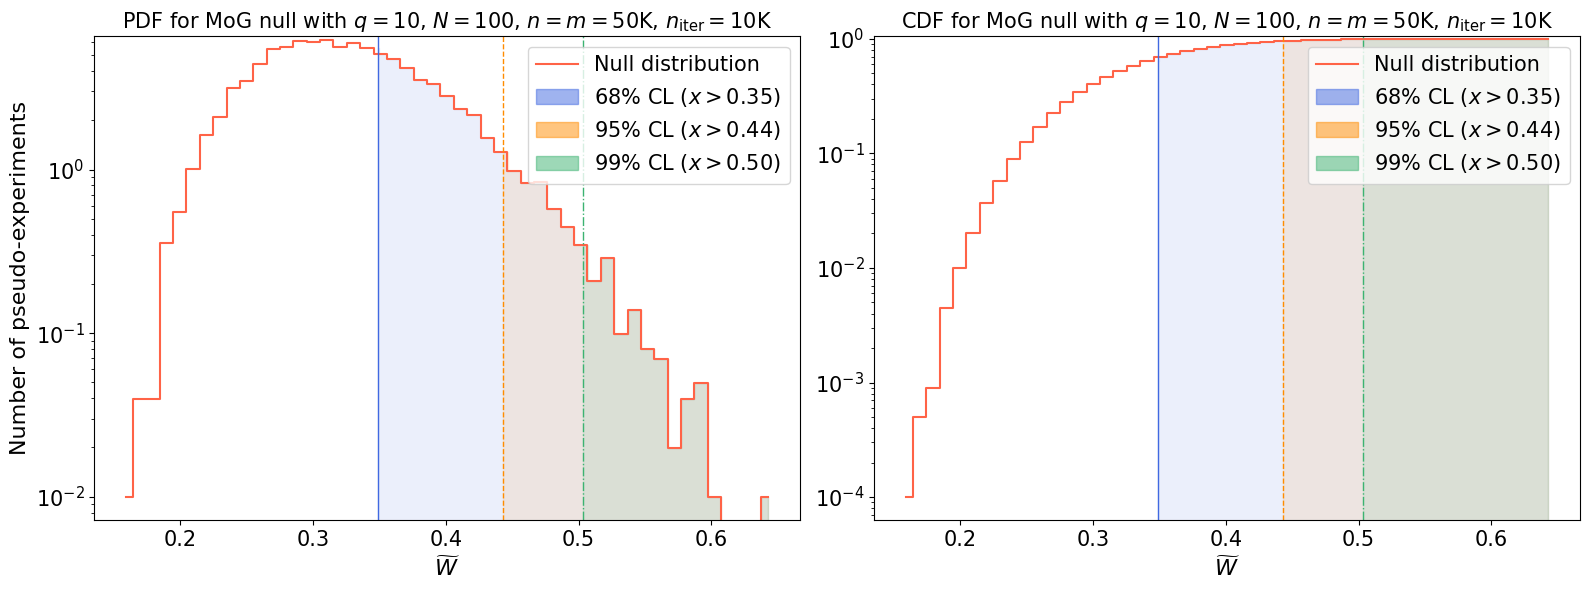

Time elapsed: 0.9825861339922994 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fab3c0ea020>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$d_{\mathrm{FGD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.015263120454184619], [...",results/100D_mixture/100D_50K/null_hypothesis/...
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 20000, 'normalise'...",metric_list,<function <lambda> at 0x7fab3c0ea0c0>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",2,$d_{\mathrm{MMD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.046901696856437525], [...",results/100D_mixture/100D_50K/null_hypothesis/...
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fab3c0eb4c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",5000,$\overline{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9129502184590641], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fab3c0eb560>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9106410004416741], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fab3c0eb600>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{W}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.3489450690289662], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fab3c0eb6a0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",20,$t_{\mu}$,results/100D_mixture/100D_50K/null_hypothesis/...,[],NaN


In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    #if "FGD" in latex:
    #    latex = r"$d_{\mathrm{FGD}}\,(\times 10)$"
    #    dist_null = dist_null * 10
    #elif "MMD" in latex:
    #    latex = r"$d_{\mathrm{MMD}}\,(\times 10^{-2})$"
    #    dist_null = dist_null / 100
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        #if "FGD" in latex:
        #    threshold_value = threshold_value * 10
        #elif "MMD" in latex:
        #    threshold_value = threshold_value / 100
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        #if "FGD" in latex:
        #    threshold_value = threshold_value * 10
        #elif "MMD" in latex:
        #    threshold_value = threshold_value / 100
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [14]:
for metric_config in list(metrics_config[unique_key].values())[:-1]:
    print(metric_config["kwargs"])

{'num_batches': 20, 'num_points': 10, 'normalise': False}
{'degree': 4, 'block_size': 20000, 'normalise': False}
{}
{'nslices': 100, 'seed_slicing': 0}
{'nslices': 100, 'seed_slicing': 0}


In [15]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [16]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(dist_1,
                                                 metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.02,
                                                 fn_tol = 0.02,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fgd with mean deformation already loaded.
Exclusion limits for fgd with cov_diag deformation already loaded.
Exclusion limits for fgd with cov_off_diag deformation already loaded.
Exclusion limits for fgd with power_abs_up deformation already loaded.
Computing exclusion limits for fgd with power_abs_down deformation.

=============== fgd - power_abs_down ===============

------------ 1 - 0.95 CL ------------
eps = 0.5 - deformation = power_abs_down


I0000 00:00:1714632790.733958 1312135 service.cc:145] XLA service 0xc0cba170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714632790.734005 1312135 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1714632790.958196 1312135 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1714632790.963574 1312135 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1714632790.969475 1312135 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1714632790.975332 1312135 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1714632790.978991 1312135 assert_op.cc:38] Ignoring Assert operator while/M

statistic = 205.89469998382384 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.998347095401568

------------ 2 - 0.95 CL ------------
eps = 0.25 - deformation = power_abs_down


I0000 00:00:1714632831.187829 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714632838.104177 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 71.53608441767696 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9952463099993512

------------ 3 - 0.95 CL ------------
eps = 0.125 - deformation = power_abs_down


I0000 00:00:1714632862.403834 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



I0000 00:00:1714632869.327196 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 21.245343510364354 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9840385538186167

------------ 4 - 0.95 CL ------------
eps = 0.0625 - deformation = power_abs_down


I0000 00:00:1714632894.269897 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714632901.369124 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 5.7877719238494665 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9420276743633167

------------ 5 - 0.95 CL ------------
eps = 0.03125 - deformation = power_abs_down


I0000 00:00:1714632925.740161 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714632932.665904 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 1.5023749436017915 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.78553267723032

------------ 6 - 0.95 CL ------------
eps = 0.015625 - deformation = power_abs_down


I0000 00:00:1714632957.020049 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714632963.979135 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.3727900164711444 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.2564744947411055

------------ 7 - 0.95 CL ------------
eps = 0.0078125 - deformation = power_abs_down


I0000 00:00:1714632988.302724 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714632995.254167 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.08798897901263199 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 0.03319059431874277

------------ 8 - 0.95 CL ------------
eps = 0.00390625 - deformation = power_abs_down


I0000 00:00:1714633019.681621 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633026.650269 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.021622365052586183 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 0.6666666666666666
relative_error_metric = 1.189707837983425

------------ 9 - 0.95 CL ------------
eps = 0.005859375 - deformation = power_abs_down


I0000 00:00:1714633051.848516 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633058.956134 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.04955596801016378 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 0.2857142857142857
relative_error_metric = 0.5281011902047329

------------ 10 - 0.95 CL ------------
eps = 0.0068359375 - deformation = power_abs_down


I0000 00:00:1714633083.383941 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633090.421884 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.065399350312268 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 0.13333333333333333
relative_error_metric = 0.2619914013127262

------------ 11 - 0.95 CL ------------
eps = 0.00732421875 - deformation = power_abs_down


I0000 00:00:1714633114.984796 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633121.975610 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.07810838400561852 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 0.06451612903225806
relative_error_metric = 0.085867706810547

------------ 12 - 0.95 CL ------------
eps = 0.007568359375 - deformation = power_abs_down


I0000 00:00:1714633146.352334 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633153.330879 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.08482012450157181 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 0.031746031746031744
relative_error_metric = 0.003485090974945007

------------ 13 - 0.95 CL ------------
eps = 0.0076904296875 - deformation = power_abs_down


I0000 00:00:1714633177.748632 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633184.777613 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.08444466469029417 - next threshold = 0.08511624635777021 at 0.95 CL
relative_error_eps = 0.015748031496062992
relative_error_metric = 0.00792142084310538
=======> statistic within required accuracy at 0.95 CL in 413.91317314002663 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 - 0.99 CL ------------
eps = 0.00775146484375 - deformation = power_abs_down


I0000 00:00:1714633210.355894 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633217.571965 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.08635306023443119 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.969232632790261
relative_error_metric = 0.45416408200983616

------------ 2 - 0.99 CL ------------
eps = 0.503875732421875 - deformation = power_abs_down


I0000 00:00:1714633242.111147 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633249.149850 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 208.0613135782506 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.9393975544288697
relative_error_metric = 1.9973660924763839

------------ 3 - 0.99 CL ------------
eps = 0.2558135986328125 - deformation = power_abs_down


I0000 00:00:1714633273.555225 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633280.550683 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 74.31538187974992 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.8823597522144386
relative_error_metric = 1.992634558536672

------------ 4 - 0.99 CL ------------
eps = 0.13178253173828125 - deformation = power_abs_down


I0000 00:00:1714633304.978848 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633311.950839 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 23.38814515668754 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.7777899283722456
relative_error_metric = 1.9766899136784963

------------ 5 - 0.99 CL ------------
eps = 0.06976699829101562 - deformation = power_abs_down


I0000 00:00:1714633336.345854 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633343.311018 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 7.141505128246654 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.6000196840706657
relative_error_metric = 1.924659216114654

------------ 6 - 0.99 CL ------------
eps = 0.03875923156738281 - deformation = power_abs_down


I0000 00:00:1714633368.935575 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633376.170939 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 2.2922735732026935 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.333360672544597
relative_error_metric = 1.7742723685241382

------------ 7 - 0.99 CL ------------
eps = 0.023255348205566406 - deformation = power_abs_down


I0000 00:00:1714633400.729994 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633407.681966 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.8355244541511586 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 1.000030756927998
relative_error_metric = 1.4361864709247154

------------ 8 - 0.99 CL ------------
eps = 0.015503406524658203 - deformation = power_abs_down


I0000 00:00:1714633432.251486 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633439.236077 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.3699197370085495 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.6666940064385163
relative_error_metric = 0.918420770546998

------------ 9 - 0.99 CL ------------
eps = 0.011627435684204102 - deformation = power_abs_down


I0000 00:00:1714633463.659042 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633470.620946 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.20565596144087653 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.4000196847971851
relative_error_metric = 0.4000709768069918

------------ 10 - 0.99 CL ------------
eps = 0.00968945026397705 - deformation = power_abs_down


I0000 00:00:1714633495.034487 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633501.994866 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.14183803642993342 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.22223437339803834
relative_error_metric = 0.034016897612071724

------------ 11 - 0.99 CL ------------
eps = 0.008720457553863525 - deformation = power_abs_down


I0000 00:00:1714633526.363008 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633533.338532 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.11199408433025926 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.10526861076126617
relative_error_metric = 0.2015332848508153

------------ 12 - 0.99 CL ------------
eps = 0.009204953908920288 - deformation = power_abs_down


I0000 00:00:1714633559.376351 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633566.697159 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.1268981590806418 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.05128463968731417
relative_error_metric = 0.07724233279509843

------------ 13 - 0.99 CL ------------
eps = 0.00944720208644867 - deformation = power_abs_down


I0000 00:00:1714633591.267907 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633598.281018 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.13271978755933947 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.025317717340775356
relative_error_metric = 0.0324227537243001

------------ 14 - 0.99 CL ------------
eps = 0.00956832617521286 - deformation = power_abs_down


I0000 00:00:1714633622.771787 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714633629.767900 1312135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.13737684957613222 - next threshold = 0.13709383792460267 at 0.99 CL
relative_error_eps = 0.012739492387218818
relative_error_metric = 0.0020622358919751274
=======> statistic within required accuracy at 0.99 CL in 444.22478429297917 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 858.1379898539744 seconds.
Saving results in the file results/100D_mixture/100D_50K/exclusion_limits.json
Exclusion limits for fgd with random_normal deformation already loaded.
Exclusion limits for fgd with random_uniform deformation already loaded.
Exclusion limits for mmd with mean deformation already loaded.
Exclusion limits for mmd with cov_diag deformation already loaded.
Exclusion limits for mmd with cov_off_diag deformation already loaded.
Exclusion limits for mmd with power_abs_up deformation already loaded.
Exclusion limits for mmd with power_abs_down deformation already loaded.
Exclusion limits for mmd with random_normal deformation already loaded.
Exclusion limits

### Likelihood-ratio test

In [17]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [19]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down"]#, "random_normal", "random_uniform"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(dist_1,
                                                metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.05,
                                                fn_tol = 0.05,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with cov_diag deformation already loaded.
Exclusion limits for LR with cov_off_diag deformation already loaded.
Computing exclusion limits for lr with power_abs_up deformation.

=============== lr - power_abs_up ===============

------------ 1 - 0.95 CL ------------
eps = 0.005 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714586684.637046 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714586885.651657 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714586892.907897 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 19.86094740498811 seconds.
statistic = 7601225.505110668 - next threshold = -7311246.231992292 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 102.85198370723114

------------ 2 - 0.95 CL ------------
eps = 0.0025 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714586904.184531 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714587104.705917 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714587112.440150 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 19.89565211883746 seconds.
statistic = 1893962.4202249213 - next threshold = -1843326.9479288624 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 147.61546396969885

------------ 3 - 0.95 CL ------------
eps = 0.00125 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714587123.906755 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714587321.454909 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714587328.543559 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.624079359928146 seconds.
statistic = 472732.34679295024 - next threshold = -462626.2857003574 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 185.10844609456637

------------ 4 - 0.95 CL ------------
eps = 0.000625 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714587339.573281 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714587536.344258 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714587543.465144 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.31398254702799 seconds.
statistic = 118110.27083464597 - next threshold = -115731.81700409857 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 196.63369945249354

------------ 5 - 0.95 CL ------------
eps = 0.0003125 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714587555.134854 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714587751.640014 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714587758.774740 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.669513787841424 seconds.
statistic = 29518.121228732554 - next threshold = -28813.7453279636 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 165.6270934113909

------------ 6 - 0.95 CL ------------
eps = 0.00015625 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714587769.767737 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714587966.544942 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714587973.622550 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.68079962581396 seconds.
statistic = 7390.841670758308 - next threshold = -7111.010529296361 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 103.64716467431975

------------ 7 - 0.95 CL ------------
eps = 7.8125e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714587984.689994 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714588181.897739 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714588188.978737 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.78611863590777 seconds.
statistic = 1848.33000974635 - next threshold = -1719.8957618641132 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 55.56501992960973

------------ 8 - 0.95 CL ------------
eps = 3.90625e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714588199.953903 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714588396.756089 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714588403.823049 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.684947709087282 seconds.
statistic = 465.2862990797479 - next threshold = -402.3086102928319 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 27.552453133301636

------------ 9 - 0.95 CL ------------
eps = 1.953125e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714588414.834844 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714588611.343719 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714588618.399048 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.74614434200339 seconds.
statistic = 117.228158641794 - next threshold = -86.06195678204902 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 13.045549556451888

------------ 10 - 0.95 CL ------------
eps = 9.765625e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714588629.655362 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714588827.231445 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714588834.328949 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.816074709873646 seconds.
statistic = 29.76149936541427 - next threshold = -14.232976475420696 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 5.666279549252501

------------ 11 - 0.95 CL ------------
eps = 4.8828125e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714588845.421836 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714589042.096898 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714589049.179546 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.695788973011076 seconds.
statistic = 7.667750661412024 - next threshold = 0.0860288669699134 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.955619647602817

------------ 12 - 0.95 CL ------------
eps = 2.44140625e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714589060.245978 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714589257.010828 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714589264.140088 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.830279832007363 seconds.
statistic = 1.938207528002192 - next threshold = 1.8545629584336316 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 0.04410737210052675

------------ 13 - 0.95 CL ------------
eps = 1.220703125e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714589275.353758 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714589473.151835 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714589481.453817 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 19.04816295602359 seconds.
statistic = 0.5400205604223424 - next threshold = 1.3590788727339858 at 0.95 CL
relative_error_eps = 0.6666666666666667
relative_error_metric = 0.862575490268414

------------ 14 - 0.95 CL ------------
eps = 1.8310546875e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714589492.664781 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714589689.461183 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714589696.558565 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.841893658041954 seconds.
statistic = 1.1318429787637865 - next threshold = 1.7151995543106038 at 0.95 CL
relative_error_eps = 0.28571428571428575
relative_error_metric = 0.409798286305809

------------ 15 - 0.95 CL ------------
eps = 2.13623046875e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714589707.741283 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714589905.157158 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714589912.246669 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.739893404999748 seconds.
statistic = 1.589916618992351 - next threshold = 1.8247595955429392 at 0.95 CL
relative_error_eps = 0.13333333333333325
relative_error_metric = 0.13754919166328536

------------ 16 - 0.95 CL ------------
eps = 2.2888183593750003e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714589923.394674 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714590120.808202 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714590127.911309 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.929846773156896 seconds.
statistic = 1.7597712221786421 - next threshold = 1.8439849371260113 at 0.95 CL
relative_error_eps = 0.06451612903225794
relative_error_metric = 0.046736633237482

------------ 17 - 0.95 CL ------------
eps = 2.3651123046875004e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714590139.135511 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714590336.739224 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714590343.810580 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 19.104541295208037 seconds.
statistic = 1.938207528002192 - next threshold = 1.8545629584336316 at 0.95 CL
relative_error_eps = 0.03278688524590166
relative_error_metric = 0.04410737210052675
=======> statistic within required accuracy at 0.95 CL in 3671.664000262972 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 - 0.99 CL ------------
eps = 2.3269653320312504e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating 

I0000 00:00:1714590356.606000 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714590553.782296 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714590560.902190 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.90467149601318 seconds.
statistic = 1.938207528002192 - next threshold = 3.4605016285255408 at 0.99 CL
relative_error_eps = 1.9990694304075054
relative_error_metric = 0.5639474386882648

------------ 2 - 0.99 CL ------------
eps = 0.005001163482666015 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714590572.093061 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714590768.829138 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714590775.926166 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.846566112944856 seconds.
statistic = 7604862.9022559915 - next threshold = -7272494.515610177 at 0.99 CL
relative_error_eps = 1.9981397263720475
relative_error_metric = 89.52330014298322

------------ 3 - 0.99 CL ------------
eps = 0.002501745223999023 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714590787.157174 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714590984.537088 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714590991.584025 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.83901064004749 seconds.
statistic = 1896496.133895293 - next threshold = -1834724.231683743 at 0.99 CL
relative_error_eps = 1.996282910146208
relative_error_metric = 120.80639358654459

------------ 4 - 0.99 CL ------------
eps = 0.0012520360946655271 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714591002.731227 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714591199.537947 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714591206.738085 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.90012153913267 seconds.
statistic = 474267.5230221254 - next threshold = -461235.0897317597 at 0.99 CL
relative_error_eps = 1.9925796114179708
relative_error_metric = 143.56530233620427

------------ 5 - 0.99 CL ------------
eps = 0.0006271815299987792 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714591218.011632 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714591416.871130 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714591424.181075 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 19.961486340034753 seconds.
statistic = 118922.7949360781 - next threshold = -115683.39439114703 at 0.99 CL
relative_error_eps = 1.9852140814664718
relative_error_metric = 144.84543425439017

------------ 6 - 0.99 CL ------------
eps = 0.00031475424766540526 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714591435.512255 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714591632.508428 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714591639.617958 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.88533859187737 seconds.
statistic = 29947.515704188543 - next threshold = -28953.235407365082 at 0.99 CL
relative_error_eps = 1.9706451819073865
relative_error_metric = 118.47916789607613

------------ 7 - 0.99 CL ------------
eps = 0.00015854060649871826 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714591650.872939 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714591847.801136 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714591854.890368 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.85313915484585 seconds.
statistic = 7606.431230951125 - next threshold = -7213.056262958389 at 0.99 CL
relative_error_eps = 1.9421396045070047
relative_error_metric = 75.3453508723675

------------ 8 - 0.99 CL ------------
eps = 8.043378591537475e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714591866.070301 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714592063.615782 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714592070.719033 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.833609530935064 seconds.
statistic = 1962.7061903607223 - next threshold = -1777.5287010069883 at 0.99 CL
relative_error_eps = 1.8875329043316686
relative_error_metric = 40.396215592090165

------------ 9 - 0.99 CL ------------
eps = 4.1380375623703e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714592081.883292 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714592279.429749 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714592286.506119 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.80424035200849 seconds.
statistic = 520.5313168933845 - next threshold = -426.0799118202993 at 0.99 CL
relative_error_eps = 1.7870412355317664
relative_error_metric = 20.044407555000554

------------ 10 - 0.99 CL ------------
eps = 2.1853670477867124e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714592297.680048 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714592495.085638 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714592502.258043 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.928368787979707 seconds.
statistic = 145.72947082395618 - next threshold = -96.17781095074022 at 0.99 CL
relative_error_eps = 1.6150696201166548
relative_error_metric = 9.763841711605467

------------ 11 - 0.99 CL ------------
eps = 1.2090317904949187e-05 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714592513.413654 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714592712.618806 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714592720.010969 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.63107708003372 seconds.
statistic = 44.891770492851485 - next threshold = -17.59702114386266 at 0.99 CL
relative_error_eps = 1.354395611494247
relative_error_metric = 4.57881410360188

------------ 12 - 0.99 CL ------------
eps = 7.2086416184902185e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714592731.506900 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714592928.247086 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714592935.293572 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.810311017092317 seconds.
statistic = 16.11270419256958 - next threshold = 0.09580872311423548 at 0.99 CL
relative_error_eps = 1.0238837048945284
relative_error_metric = 1.9763559498363288

------------ 13 - 0.99 CL ------------
eps = 4.767803475260734e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714592946.559842 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714593143.474037 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714593150.627637 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.078597165877 seconds.
statistic = 7.309097630960238 - next threshold = 3.472066032285197 at 0.99 CL
relative_error_eps = 0.6880669996521371
relative_error_metric = 0.7118028662816879

------------ 14 - 0.99 CL ------------
eps = 3.547384403645992e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714593161.948026 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714593359.248059 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714593366.329211 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.904265957186 seconds.
statistic = 4.194565139814914 - next threshold = 3.8938523546812918 at 0.99 CL
relative_error_eps = 0.4155078013835831
relative_error_metric = 0.07435639550956502

------------ 15 - 0.99 CL ------------
eps = 2.937174867838621e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714593377.515772 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714593575.367101 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714593582.470037 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.966560123022646 seconds.
statistic = 2.959114739056142 - next threshold = 3.78686584216588 at 0.99 CL
relative_error_eps = 0.18820385789076644
relative_error_metric = 0.2454057177139968

------------ 16 - 0.99 CL ------------
eps = 3.242279635742307e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714593593.760410 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714593791.177366 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714593798.415233 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.169767305022106 seconds.
statistic = 3.4275496867656403 - next threshold = 3.85517316710759 at 0.99 CL
relative_error_eps = 0.08987330334275954
relative_error_metric = 0.11743505524572402

------------ 17 - 0.99 CL ------------
eps = 3.3948320196941497e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714593809.923468 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714594006.927712 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714594013.945725 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 20.087011095136404 seconds.
statistic = 3.6746397623866085 - next threshold = 3.876291313120574 at 0.99 CL
relative_error_eps = 0.04394918701726219
relative_error_metric = 0.05341104261646859

------------ 18 - 0.99 CL ------------
eps = 3.4711082116700708e-06 - deformation = power_abs_up
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714594027.756894 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714594225.101706 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714594232.421276 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.47828544699587 seconds.
statistic = 3.9303115789721255 - next threshold = 3.888719127999201 at 0.99 CL
relative_error_eps = 0.02221871714743005
relative_error_metric = 0.010638774173336146
=======> statistic within required accuracy at 0.99 CL in 3887.33486439893 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 7558.998901409097 seconds.
Saving results in the file results/100D_mixture/100D_50K/exclusion_limits.json
Computing exclusion limits for lr with power_abs_down deformation.

=============== lr - power_abs_down ===============

------------ 1 - 0.95 CL ------------
eps = 0.005 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alte

I0000 00:00:1714594243.848893 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714594440.579882 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714594447.710547 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.949177101021633 seconds.
statistic = 7496114.962744322 - next threshold = -7564738.215578332 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -438.9431440900289

------------ 2 - 0.95 CL ------------
eps = 0.0025 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714594458.997449 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714594656.659876 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714594663.833756 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.108746372163296 seconds.
statistic = 1880384.278597726 - next threshold = -1874830.222574458 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1352.242211976321

------------ 3 - 0.95 CL ------------
eps = 0.00125 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714594675.148488 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714594871.962670 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714594879.075548 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.012155844829977 seconds.
statistic = 470871.77664302755 - next threshold = -466566.9889632875 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 435.53310190802387

------------ 4 - 0.95 CL ------------
eps = 0.000625 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714594890.340766 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714595087.339392 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714595094.397643 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.8329485100694 seconds.
statistic = 117790.45188628043 - next threshold = -116242.35888490769 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 302.3498078780347

------------ 5 - 0.95 CL ------------
eps = 0.0003125 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714595105.620381 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714595302.818670 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714595309.921566 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.953162610996515 seconds.
statistic = 29445.780079761476 - next threshold = -28882.77595067494 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 207.20471846298284

------------ 6 - 0.95 CL ------------
eps = 0.00015625 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714595321.190659 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714595518.918334 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714595526.061060 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.956608176929876 seconds.
statistic = 7352.955383557069 - next threshold = -7118.37387454447 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 123.37996561633776

------------ 7 - 0.95 CL ------------
eps = 7.8125e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714595537.345900 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714595734.949003 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714595742.067259 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 20.97378411400132 seconds.
statistic = 1836.2058267090767 - next threshold = -1726.2262272137737 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 64.78350658250926

------------ 8 - 0.95 CL ------------
eps = 3.90625e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714595756.677880 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714595953.827984 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714595960.988068 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.301576950820163 seconds.
statistic = 456.55824122772947 - next threshold = -401.8871517556963 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 31.403998027972765

------------ 9 - 0.95 CL ------------
eps = 1.953125e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714595972.330611 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714596169.286064 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714596176.441568 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.154153208015487 seconds.
statistic = 113.58313928388239 - next threshold = -85.98251076812774 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 14.460949680047795

------------ 10 - 0.95 CL ------------
eps = 9.765625e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714596187.833418 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714596384.922019 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714596392.268619 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.48468415113166 seconds.
statistic = 27.94132509779607 - next threshold = -14.205708889524463 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 6.136897442131431

------------ 11 - 0.95 CL ------------
eps = 4.8828125e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714596403.763647 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714596601.283252 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714596608.376871 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 17.959213475929573 seconds.
statistic = 6.757955451822235 - next threshold = 0.1287896567692645 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9251956303080864

------------ 12 - 0.95 CL ------------
eps = 2.44140625e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714596619.724396 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714596817.518886 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714596824.645567 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.075649657985196 seconds.
statistic = 1.5757827081153728 - next threshold = 1.8735493800692076 at 0.95 CL
relative_error_eps = 0.6666666666666667
relative_error_metric = 0.172651785529037

------------ 13 - 0.95 CL ------------
eps = 3.662109375e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714596835.961389 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714597033.170986 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714597040.251142 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.02397889504209 seconds.
statistic = 3.6531435316153207 - next threshold = 1.4784717394795985 at 0.95 CL
relative_error_eps = 0.3999999999999999
relative_error_metric = 0.8475583913646427

------------ 14 - 0.95 CL ------------
eps = 3.0517578125e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714597051.617600 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714597249.302731 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714597256.460859 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.095169215928763 seconds.
statistic = 2.507194198506075 - next threshold = 1.7825547397976043 at 0.95 CL
relative_error_eps = 0.22222222222222227
relative_error_metric = 0.3378470251431633

------------ 15 - 0.95 CL ------------
eps = 2.74658203125e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714597267.853018 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714597464.585256 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714597471.706077 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.123293170006946 seconds.
statistic = 2.014671189961363 - next threshold = 1.8554787580853018 at 0.95 CL
relative_error_eps = 0.11764705882352937
relative_error_metric = 0.08226680310224592

------------ 16 - 0.95 CL ------------
eps = 2.5939941406249998e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714597483.406799 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714597681.558303 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714597688.701936 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.133855280000716 seconds.
statistic = 1.8326796503470761 - next threshold = 1.8685391457936056 at 0.95 CL
relative_error_eps = 0.0571428571428572
relative_error_metric = 0.019377128141638476

------------ 17 - 0.95 CL ------------
eps = 2.6702880859375e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714597703.996402 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714597901.466643 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714597908.702036 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.52015937305987 seconds.
statistic = 1.9226027293858028 - next threshold = 1.8631042253844288 at 0.95 CL
relative_error_eps = 0.02898550724637684
relative_error_metric = 0.03143323279494844
=======> statistic within required accuracy at 0.95 CL in 3676.231997848954 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 - 0.99 CL ------------
eps = 2.63214111328125e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating 

I0000 00:00:1714597920.239133 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714598117.060696 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714598124.167415 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.039790468057618 seconds.
statistic = 1.8326796503470761 - next threshold = 3.5788004104990154 at 0.99 CL
relative_error_eps = 1.9989474206084366
relative_error_metric = 0.6453394415275481

------------ 2 - 0.99 CL ------------
eps = 0.005001316070556641 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714598135.611741 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714598333.418773 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714598340.560739 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.122005554148927 seconds.
statistic = 7500033.914673853 - next threshold = -7522310.037729023 at 0.99 CL
relative_error_eps = 1.9978959485574668
relative_error_metric = -1348.7395374139116

------------ 3 - 0.99 CL ------------
eps = 0.002501974105834961 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714598351.960934 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714598548.920252 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714598556.104095 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.28003578609787 seconds.
statistic = 1883339.420782175 - next threshold = -1866591.4987486878 at 0.99 CL
relative_error_eps = 1.9957963194949488
relative_error_metric = 447.8084997091525

------------ 4 - 0.99 CL ------------
eps = 0.0012523031234741213 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714598567.711877 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714598765.102847 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714598772.301050 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.237883097026497 seconds.
statistic = 472578.43910139886 - next threshold = -465337.6685959351 at 0.99 CL
relative_error_eps = 1.991610272856117
relative_error_metric = 259.06527682091246

------------ 5 - 0.99 CL ------------
eps = 0.0006274676322937013 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714598783.792393 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714598981.377287 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714598988.488630 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.31538006500341 seconds.
statistic = 118713.19593266927 - next threshold = -116343.13706394797 at 0.99 CL
relative_error_eps = 1.9832906392011593
relative_error_metric = 198.35484772024688

------------ 6 - 0.99 CL ------------
eps = 0.00031504988670349126 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714598999.858250 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714599198.090079 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714599205.292074 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.184152255998924 seconds.
statistic = 29930.889113364345 - next threshold = -29105.510590661117 at 0.99 CL
relative_error_eps = 1.9668581678180503
relative_error_metric = 143.0529098592805

------------ 7 - 0.99 CL ------------
eps = 0.00015884101390838625 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714599216.810829 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714599414.787353 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714599422.014360 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.532598023070022 seconds.
statistic = 7602.123451449967 - next threshold = -7253.039838198813 at 0.99 CL
relative_error_eps = 1.9347968121901613
relative_error_metric = 85.10948509611642

------------ 8 - 0.99 CL ------------
eps = 8.073657751083375e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714599433.589329 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714599632.066825 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714599639.225570 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.232917005894706 seconds.
statistic = 1961.773383273854 - next threshold = -1791.612679427254 at 0.99 CL
relative_error_eps = 1.8737108519012362
relative_error_metric = 44.11577970534007

------------ 9 - 0.99 CL ------------
eps = 4.16843593120575e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714599650.727137 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714599848.986621 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714599856.192721 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.332391995936632 seconds.
statistic = 520.2161725992669 - next threshold = -434.1509687648712 at 0.99 CL
relative_error_eps = 1.762423378378833
relative_error_metric = 22.17776984995017

------------ 10 - 0.99 CL ------------
eps = 2.2158250212669374e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714599867.588289 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714600066.180768 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714600073.283980 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.109671397833154 seconds.
statistic = 146.37688888701393 - next threshold = -100.48441588416159 at 0.99 CL
relative_error_eps = 1.5752965608855198
relative_error_metric = 10.758248079410862

------------ 11 - 0.99 CL ------------
eps = 1.2395195662975313e-05 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714600089.308087 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714600287.590990 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714600295.043204 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 19.095230829901993 seconds.
statistic = 45.254852997977416 - next threshold = -19.646850284176956 at 0.99 CL
relative_error_eps = 1.2993725628242854
relative_error_metric = 5.068861012512941

------------ 12 - 0.99 CL ------------
eps = 7.513668388128281e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714600306.871996 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714600504.375016 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714600511.586068 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.337763036834076 seconds.
statistic = 16.331137548772595 - next threshold = -0.785295529592046 at 0.99 CL
relative_error_eps = 0.9622745773353726
relative_error_metric = 2.2020593104247794

------------ 13 - 0.99 CL ------------
eps = 5.072904750704765e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714600523.124895 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714600721.258662 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714600728.436287 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.37155978893861 seconds.
statistic = 7.278733159963038 - next threshold = 3.1741517948633935 at 0.99 CL
relative_error_eps = 0.6335494117775041
relative_error_metric = 0.7853489984512702

------------ 14 - 0.99 CL ------------
eps = 3.8525229319930075e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714600740.019901 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714600937.272855 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714600944.376135 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.100170260993764 seconds.
statistic = 4.1715937420820035 - next threshold = 3.819622029068314 at 0.99 CL
relative_error_eps = 0.37639014455995423
relative_error_metric = 0.08808965321256096

------------ 15 - 0.99 CL ------------
eps = 3.2423320226371286e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714600955.792119 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714601153.507120 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714601160.740068 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.438821321120486 seconds.
statistic = 2.8284525486471748 - next threshold = 3.8117179566125503 at 0.99 CL
relative_error_eps = 0.17200941055395794
relative_error_metric = 0.29615667464759354

------------ 16 - 0.99 CL ------------
eps = 3.547427477315068e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714601172.269893 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714601370.013794 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714601377.239554 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.426682016113773 seconds.
statistic = 3.5288944105490003 - next threshold = 3.848276804726298 at 0.99 CL
relative_error_eps = 0.08245878358702867
relative_error_metric = 0.08658668339321685

------------ 17 - 0.99 CL ------------
eps = 3.6999752046540377e-06 - deformation = power_abs_down
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 50000
nchunks = 500
Iterating from 0 to 20 out of 10000 .


I0000 00:00:1714601388.865323 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 20 to 40 out of 10000 .
Iterating from 40 to 60 out of 10000 .
Iterating from 60 to 80 out of 10000 .
Iterating from 80 to 100 out of 10000 .
Iterating from 100 to 120 out of 10000 .
Iterating from 120 to 140 out of 10000 .
Iterating from 140 to 160 out of 10000 .
Iterating from 160 to 180 out of 10000 .
Iterating from 180 to 200 out of 10000 .
Iterating from 200 to 220 out of 10000 .
Iterating from 220 to 240 out of 10000 .
Iterating from 240 to 260 out of 10000 .
Iterating from 260 to 280 out of 10000 .
Iterating from 280 to 300 out of 10000 .
Iterating from 300 to 320 out of 10000 .
Iterating from 320 to 340 out of 10000 .
Iterating from 340 to 360 out of 10000 .
Iterating from 360 to 380 out of 10000 .
Iterating from 380 to 400 out of 10000 .
Iterating from 400 to 420 out of 10000 .
Iterating from 420 to 440 out of 10000 .
Iterating from 440 to 460 out of 10000 .
Iterating from 460 to 480 out of 10000 .
Iterating from 480 to 500 out of 10000 .
Iterating from 500 to 5

I0000 00:00:1714601587.691658 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714601594.940909 1044805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_5', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.450132049852982 seconds.
statistic = 3.779538025920813 - next threshold = 3.843264411741799 at 0.99 CL
relative_error_eps = 0.04039662760028002
relative_error_metric = 0.016719936359921264
=======> statistic within required accuracy at 0.99 CL in 3686.124445148045 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 7362.356479306007 seconds.
Saving results in the file results/100D_mixture/100D_50K/exclusion_limits.json
dict_keys(['fgd_mean_2024-04-30T09:32:16.827831', 'fgd_cov_diag_2024-04-30T09:50:25.978795', 'fgd_cov_off_diag_2024-04-30T10:09:37.809194', 'fgd_power_abs_up_2024-04-30T10:37:53.869269', 'fgd_power_abs_down_2024-04-30T10:58:54.879139', 'fgd_random_normal_2024-04-30T11:59:55.588874', 'fgd_random_uniform_2024-04-30T12:21:50.367049', 'mmd_mean_2024-04-30T12:35:17.234542', 'mmd_cov_diag_2024-04-30T12:50:49.118804', 'mmd_cov_off_diag_2024-04-30T13:10:15.736874', 'mmd_power_abs_up_2024-04-30T13:36:05.195668', 'mmd_power_ab

### Show and save results

In [27]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [28]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_cov_diag = results_df[results_df["Deformation"] == "cov_diag"]
results_df_cov_off_diag = results_df[results_df["Deformation"] == "cov_off_diag"]
results_df_power_abs_up = results_df[results_df["Deformation"] == "power_abs_up"]
results_df_power_abs_down = results_df[results_df["Deformation"] == "power_abs_down"]
results_df_random_normal = results_df[results_df["Deformation"] == "random_normal"]
results_df_random_uniform = results_df[results_df["Deformation"] == "random_uniform"]

In [29]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
35,lr,mean,100,10000,50000,0.00003,0.00005,6154
14,ks,mean,100,10000,50000,0.00338,0.00463,745
21,sks,mean,100,10000,50000,0.03693,0.04632,674
28,swd,mean,100,10000,50000,0.04364,0.05544,568
7,mmd,mean,100,10000,50000,0.04913,0.06394,931
0,fgd,mean,100,10000,50000,0.06126,0.07634,1089


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
35,lr,0.00003,0.00005,6154
14,ks,0.00338,0.00463,745
21,sks,0.03693,0.04632,674
28,swd,0.04364,0.05544,568
7,mmd,0.04913,0.06394,931
0,fgd,0.06126,0.07634,1089


In [30]:
sorted_df_cov_diag = results_df_cov_diag.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov_diag.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_cov_diag)
sorted_df_cov_diag.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov_diag)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\sigma_{ii}}$ (s)
36,lr,cov_diag,100,10000,50000,0.0,0.00001,7730
15,ks,cov_diag,100,10000,50000,0.00065,0.00094,867
22,sks,cov_diag,100,10000,50000,0.00622,0.00767,839
29,swd,cov_diag,100,10000,50000,0.00801,0.01007,585
8,mmd,cov_diag,100,10000,50000,0.00858,0.01098,1166
1,fgd,cov_diag,100,10000,50000,0.01015,0.01266,1151


,Statistic,$\epsilon^{\sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\sigma_{ii}}$ (s)
36,lr,0.0,0.00001,7730
15,ks,0.00065,0.00094,867
22,sks,0.00622,0.00767,839
29,swd,0.00801,0.01007,585
8,mmd,0.00858,0.01098,1166
1,fgd,0.01015,0.01266,1151


In [31]:
sorted_df_cov_off_diag = results_df_cov_off_diag.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov_off_diag.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{i\\neq j}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{i\\neq j}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{i\\neq j}}$ (s)"}, inplace=True)
display(sorted_df_cov_off_diag)
sorted_df_cov_off_diag.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov_off_diag)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
37,lr,cov_off_diag,100,10000,50000,0.0,0.0,11369
16,ks,cov_off_diag,100,10000,50000,0.00002,0.00002,1219
23,sks,cov_off_diag,100,10000,50000,0.00014,0.00017,1129
9,mmd,cov_off_diag,100,10000,50000,0.00017,0.00022,1549
30,swd,cov_off_diag,100,10000,50000,0.00018,0.00022,835
2,fgd,cov_off_diag,100,10000,50000,0.00021,0.00027,1696


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
37,lr,0.0,0.0,11369
16,ks,0.00002,0.00002,1219
23,sks,0.00014,0.00017,1129
9,mmd,0.00017,0.00022,1549
30,swd,0.00018,0.00022,835
2,fgd,0.00021,0.00027,1696


In [32]:
sorted_df_power_abs_up = results_df_power_abs_up.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_power_abs_up.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{+}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{+}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\rm{pow}_{+}}$ (s)"}, inplace=True)
display(sorted_df_power_abs_up)
sorted_df_power_abs_up.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_power_abs_up)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
38,lr,power_abs_up,100,10000,50000,0.0,0.0,7558
17,ks,power_abs_up,100,10000,50000,0.00029,0.00042,1054
10,mmd,power_abs_up,100,10000,50000,0.00358,0.00461,1220
24,sks,power_abs_up,100,10000,50000,0.00492,0.0061,856
31,swd,power_abs_up,100,10000,50000,0.00546,0.00702,618
3,fgd,power_abs_up,100,10000,50000,0.0073,0.0092,1261


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
38,lr,0.0,0.0,7558
17,ks,0.00029,0.00042,1054
10,mmd,0.00358,0.00461,1220
24,sks,0.00492,0.0061,856
31,swd,0.00546,0.00702,618
3,fgd,0.0073,0.0092,1261


In [34]:
results_df_power_abs_down

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon_{95\%\mathrm{CL}}$,$\epsilon_{99\%\mathrm{CL}}$,t (s)
4,fgd,power_abs_down,100,10000,50000,N/A,N/A,3660
11,mmd,power_abs_down,100,10000,50000,0.00357,0.00465,1227
18,ks,power_abs_down,100,10000,50000,0.0003,0.00045,1123
25,sks,power_abs_down,100,10000,50000,0.005,0.00618,852
32,swd,power_abs_down,100,10000,50000,0.00576,0.00732,627
39,lr,power_abs_down,100,10000,50000,0.0,0.0,7362


In [33]:
sorted_df_power_abs_down = results_df_power_abs_down.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_power_abs_down.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{-}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{-}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\rm{pow}_{-}}$ (s)"}, inplace=True)
display(sorted_df_power_abs_down)
sorted_df_power_abs_down.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_power_abs_down)

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
sorted_df_random_normal = results_df_random_normal.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_random_normal.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{N}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{N}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mathcal{N}}$ (s)"}, inplace=True)
display(sorted_df_random_normal)
sorted_df_random_normal.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_random_normal)

In [ ]:
sorted_df_random_uniform = results_df_random_uniform.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_random_uniform.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{U}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{U}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mathcal{U}}$ (s)"}, inplace=True)
display(sorted_df_random_uniform)
sorted_df_random_uniform.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_random_uniform)

In [ ]:
# Table with first 4 columns
result_table_1 = sorted_df_mean.merge(results_df_cov_diag, on='Statistic', how='outer')
result_table_1 = result_table_1.merge(results_df_cov_off_diag, on='Statistic', how='outer')
result_table_1 = result_table_1.merge(sorted_df_power_abs_up, on='Statistic', how='outer')
# Fix columns names
result_table_1 = result_table_1.replace("lr",  "$t_{\\mathrm{LLR}}$")
result_table_1 = result_table_1.replace("ks",  "$\\overline{D}$")
result_table_1 = result_table_1.replace("sks", "$\\widetilde{D}$")
result_table_1 = result_table_1.replace("swd", "$\\widetilde{W}$")
result_table_1 = result_table_1.replace("fgd", "$d_{\\mathrm{FGD}_{\\infty}}$")
result_table_1 = result_table_1.replace("fn",  "$\\overline{\\|\cdot\\|}_{F}$")
result_table_1 = result_table_1.replace("mmd", "$d_{\\mathrm{MMD}^{2}_{u}}$")
# Table with last 4 columns
result_table_2 = sorted_df_power_abs_down.merge(sorted_df_random_normal, on='Statistic', how='outer')
result_table_2 = result_table_2.merge(sorted_df_random_uniform, on='Statistic', how='outer')
result_table_2 = result_table_2.merge(times_df, on='Statistic', how='outer')
# Fix columns names
result_table_2 = result_table_2.replace("lr",  "$t_{\\mathrm{LLR}}$")
result_table_2 = result_table_2.replace("ks",  "$\\overline{D}$")
result_table_2 = result_table_2.replace("sks", "$\\widetilde{D}$")
result_table_2 = result_table_2.replace("swd", "$\\widetilde{W}$")
result_table_2 = result_table_2.replace("fgd", "$d_{\\mathrm{FGD}_{\\infty}}$")
result_table_2 = result_table_2.replace("fn",  "$\\overline{\\|\cdot\\|}_{F}$")
result_table_2 = result_table_2.replace("mmd", "$d_{\\mathrm{MMD}^{2}_{u}}$")
#display(result_table)
# Make Latex Table (first part)
string = result_table_1.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g")
# Legend row
string = string.replace("\\toprule",
    "\\toprule\n\\multicolumn{1}{c}{} \
     & \\multicolumn{3}{c}{$\\mu$-deformation} \
     & \\multicolumn{3}{c}{$\\Sigma_{ii}$-deformation} \
     & \\multicolumn{3}{c}{$\\Sigma_{i\\neq j}$-deformation} \
     & \\multicolumn{3}{c}{$\\rm{pow}_{+}$-deformation} \\\\")
# Fix sub-columns names
string = string.replace("^{\\mu}", "")
string = string.replace("^{\\Sigma_{ii}}", "")
string = string.replace("^{\\Sigma_{i\\neq j}}", "")
string = string.replace("^{\\rm{pow}_{+}}", "")
# Close first table
string = string.replace("\\bottomrule\n\\end{tabular}\n","")
string = string.replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=10^{4}}$} \\\\")
string = string.rstrip()
#display(result_table)
# Make Latex Table (second part)
string = string + result_table_2.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g")
# Legend row
string = string.replace("\\toprule",
    "\\toprule\n\\multicolumn{1}{c}{} \
     & \\multicolumn{3}{c}{$\\rm{pow}_{-}$-deformation} \
     & \\multicolumn{3}{c}{$\\mathcal{N}$-deformation} \
     & \\multicolumn{3}{c}{$\\mathcal{U}$-deformation} \
     & \\multicolumn{3}{c}{} \\\\")
# Fix sub-columns names
string = string.replace("^{\\rm{pow}_{-}}", "")
string = string.replace("^{\\mathcal{N}}", "")
string = string.replace("^{\\mathcal{U}}", "")
string = string.replace("\\begin{tabular}{l|llr|llr|llr|r}","")
string = string.lstrip()
print(string)

\begin{tabular}{l|llr|llr|llr|llr}
\toprule
\multicolumn{13}{c}{$\mathbf{n=m=10^{4}}$} \\
\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\sigma$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}-\Sigma_{ii}$-deformation} & \multicolumn{3}{c}{$\Sigma_{ij}$-deformation} \\
Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & t (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 0.01 & 0.014 & 329 & 0.0018 & 0.0027 & 413 & 0.0022 & 0.0034 & 662 & 0.014 & 0.02 & 339 \\
$d_{\mathrm{MMD}}$ & 0.021 & 0.03 & 298 & 0.15 & 0.2 & 267 & 0.18 & 0.24 & 270 & 0.12 & 0.16 & 271 \\
$\widetilde{W}$ & 0.03 & 0.04 & 128 & 0.032 & 0.044 & 129 & 0.065 & 0.091 & 163 & 0.044 & 0.06 & 130 \\
$\widetilde{D}$ & 0.031 & 0.04 & 200 & 0.034 & 0.045 & 203 & 0.063 & 0.086 